# K Nearest Neighbors.



## DATA READ:

### Importing the required python libraries for the analyses of data and data visualization.

In [2]:
#import required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Pd.read_csv() function is used to read and store the data into a pandas data frame.

In [3]:
#reading the dataset
df=pd.read_csv('../data/kc_house_data.csv')

### Df.head() gives the first five rows of the dataset.

In [4]:
#to get the top five rows in the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### A summary of the dataset can be obtained through df.info() consisting of column names, data type(float64, int64, object), non-null values, and the memory used by the data frame.

In [5]:
#info() to get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## EDA (Exploratory Data Analysis) :

### Isna() function is used to detect missing values in a dataset and sum() is used to add those null values to show how many missing values are there in each column.

In [6]:
#isna() to check null values and sum() to add those null values in dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Describe() function is used for the statistical summary of numerical columns in the dataset. It gives the minimum and maximum value, standard deviation, and mean of those numerical columns.

In [7]:
#describe() to return stastistical summary of dataframe and transpose() is used to transpose columns and index in a dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### maximum number of houses sold are in the range of 0 and 3 million dollars.

/var/folders/cn/r_mvyq893c357lflld6x0pvw0000gn/T/ipykernel_34209/236993212.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

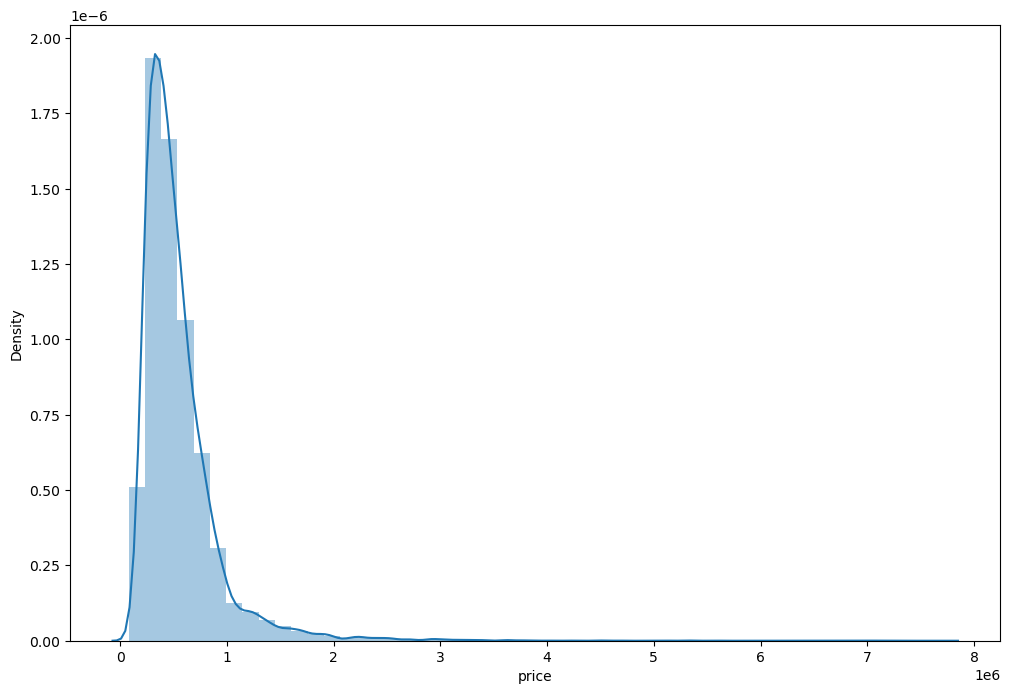

In [8]:
# sns.displot is used to show the distribution of price column
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

### df.corr() finds the correlation of each column in the dataset

/var/folders/cn/r_mvyq893c357lflld6x0pvw0000gn/T/ipykernel_34209/916687304.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values().plot(kind='bar')


<AxesSubplot: >

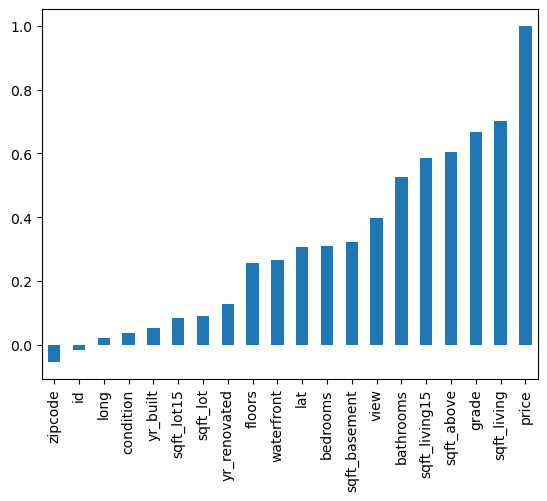

In [9]:
# correlation between feature columns and price column
df.corr()['price'].sort_values().plot(kind='bar')

## What are the factors that affect the price of the house?



### scatterplot is plotted between the sqft_living which has the highest correlation with the price column and price column

<AxesSubplot: xlabel='price', ylabel='sqft_living'>

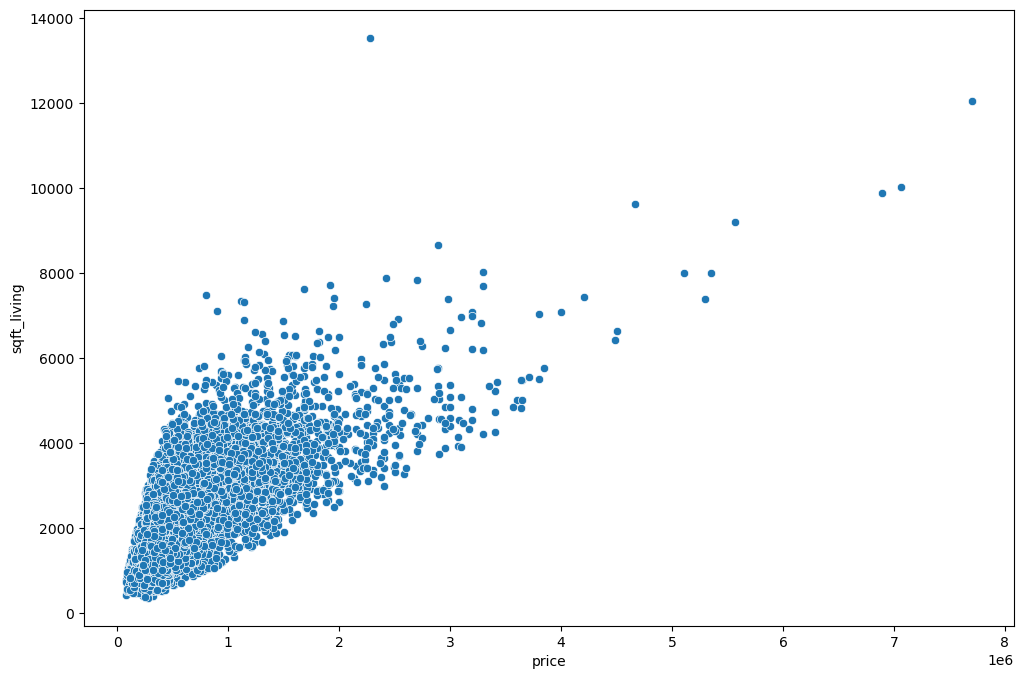

In [10]:
# scatterplot is plot between price and sqft_living
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='price',y='sqft_living')

### A count plot is used to represent how many counts are there in each category

### countplot to show how many bedrooms that majority of the customers choosed while buying a house.

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

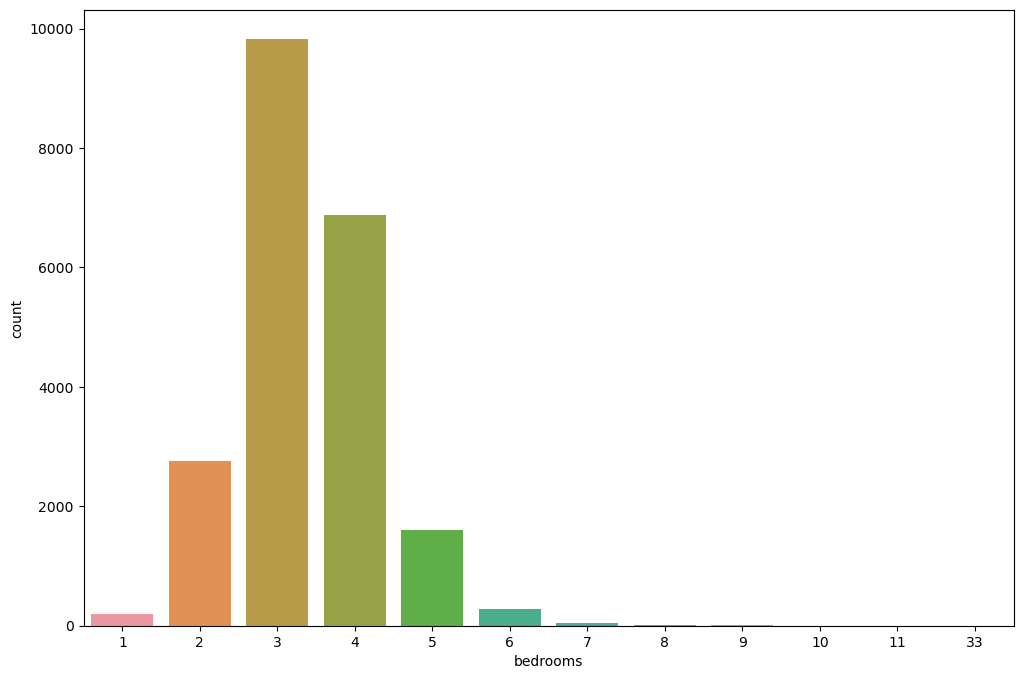

In [11]:
plt.figure(figsize=(12,8))
#countplot plotted on bedroom column
sns.countplot(data=df,x=df['bedrooms'])

### Boxplot is plotted to show the distribution of price per bedrooms

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

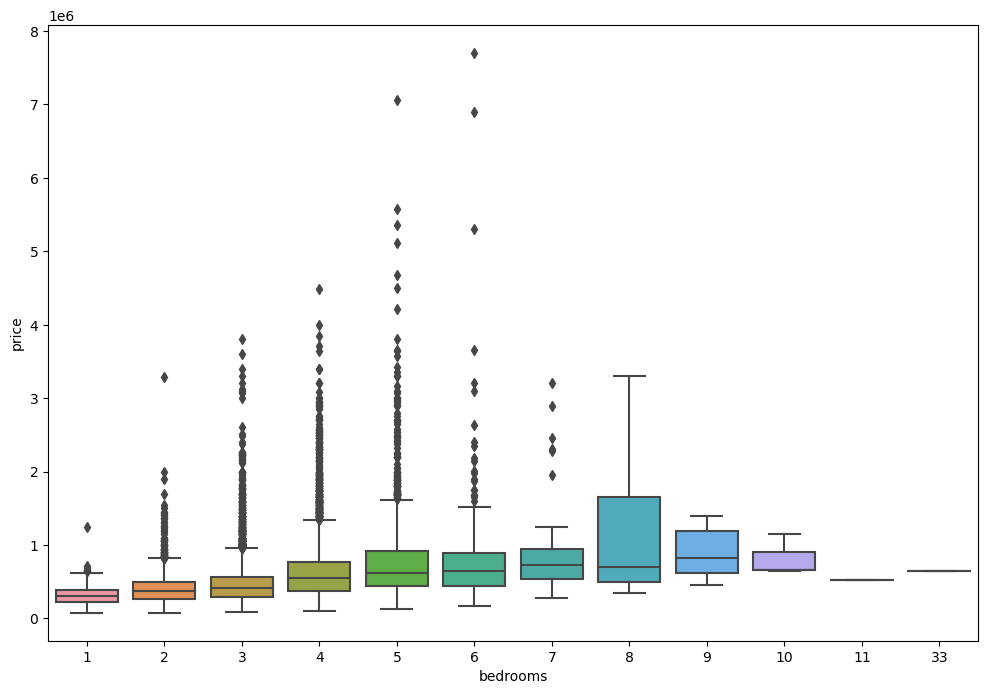

In [12]:
#boxplot between price and bedrooms column
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

### Does living by water front has any direct Correlation towards increase in the price of the house?


### scatterplot is plotted to show if there is any differentiating factor just from latitude

<AxesSubplot: xlabel='price', ylabel='lat'>

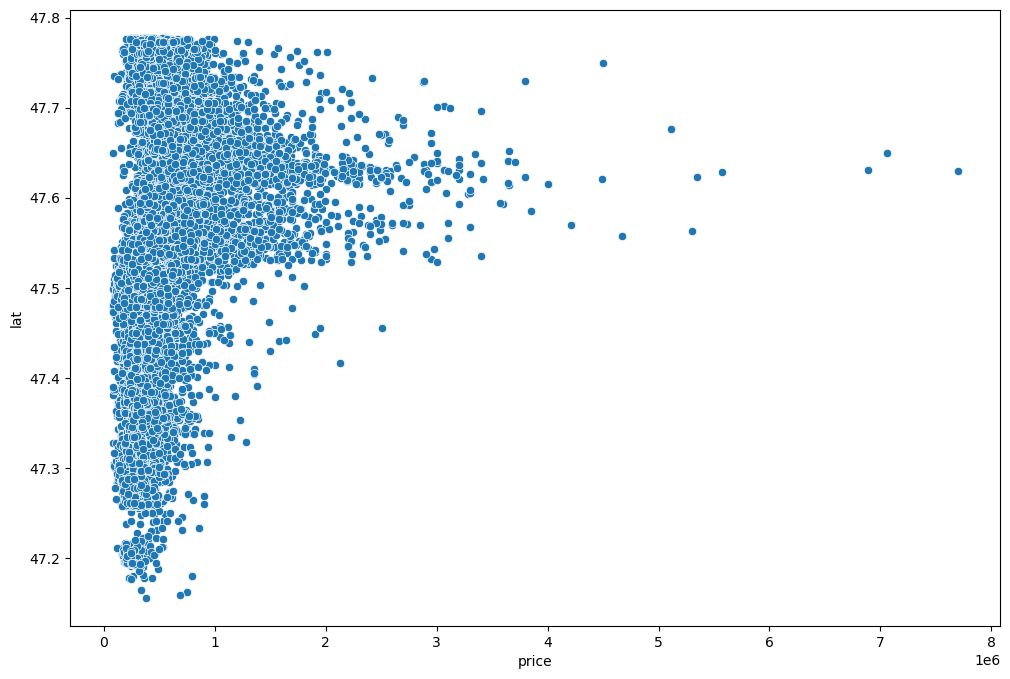

In [13]:
#scatterplot between price and lat columns.
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

### scatterplot is plotted to show if there is any differentiating factor just from longitude

<AxesSubplot: xlabel='price', ylabel='long'>

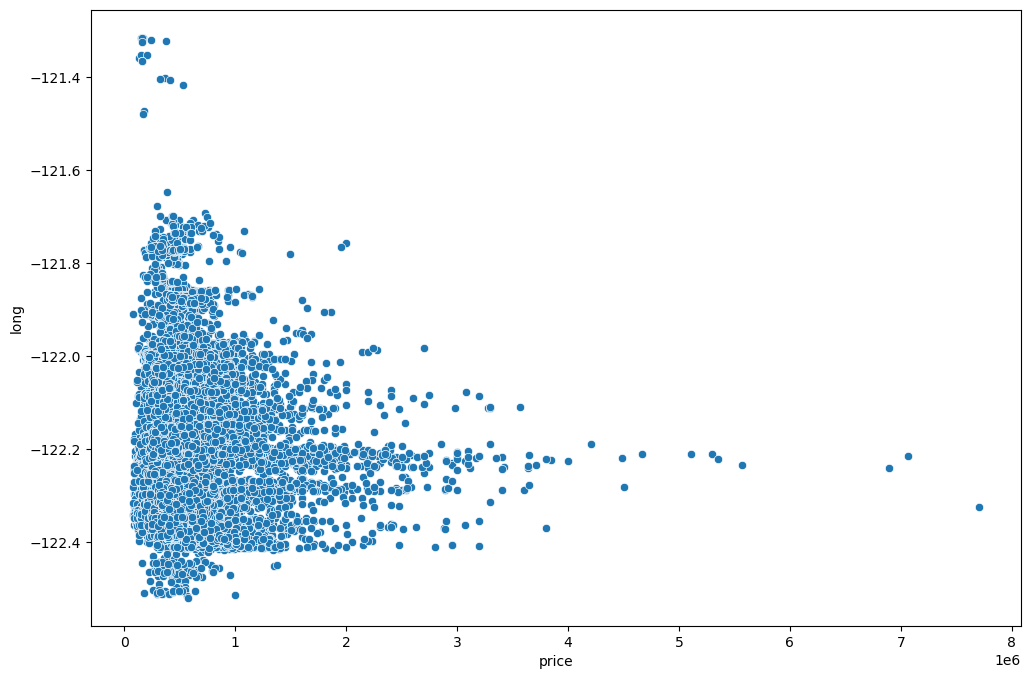

In [14]:
#scatterplot between price and long columns.
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

### scatterplot is plotted between lat and long column and separated by price column to see if the plot more or less matches to the map of king county USA.

<AxesSubplot: xlabel='long', ylabel='lat'>

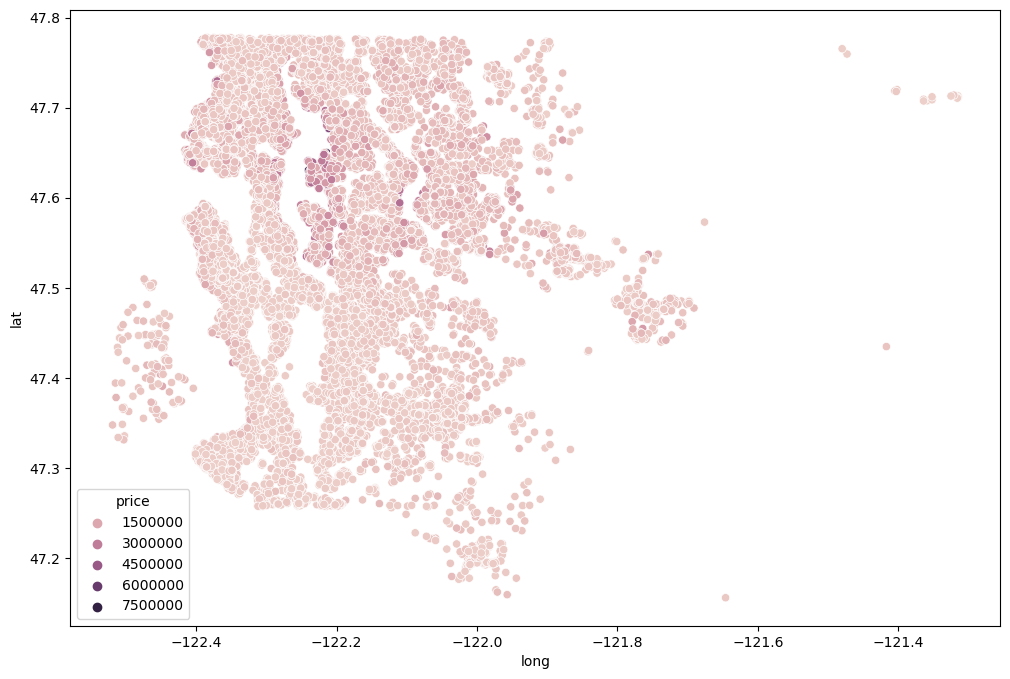

In [15]:
#scatterplot between lat and long colored by price column
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

### sampling out the 1% percent of data to get clear distribution of price on the scatterplot

In [16]:
#df.nlargest() to get top 20 houses which are expensive
df.nlargest(20,'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [17]:
len(df)*(0.01)

215.97

In [18]:
top_1_percent=df.sort_values('price',ascending=False).iloc[216:]

### scatterplot to visualize the clear distribution of price between lat and long column.

<AxesSubplot: xlabel='long', ylabel='lat'>

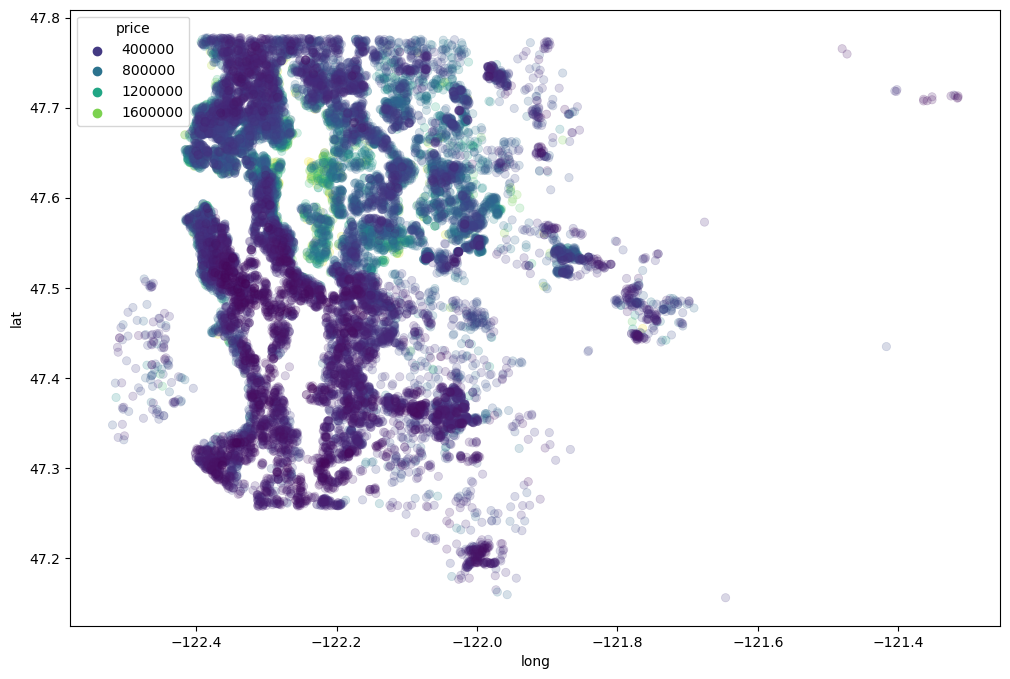

In [19]:
#scatterplot between lat and long colored by price column
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=top_1_percent,hue='price',
                palette='viridis',edgecolor=None,alpha=0.2)

#### This scatterplot shows that at 47.6 lat and -122.2 long the prices of the houses are more, the edge points tends to be lighter and we can see that water front properties are likely to be expensive in King County USA.

### Boxplot to see whether the house is on the waterfront or not

<AxesSubplot: xlabel='waterfront', ylabel='price'>

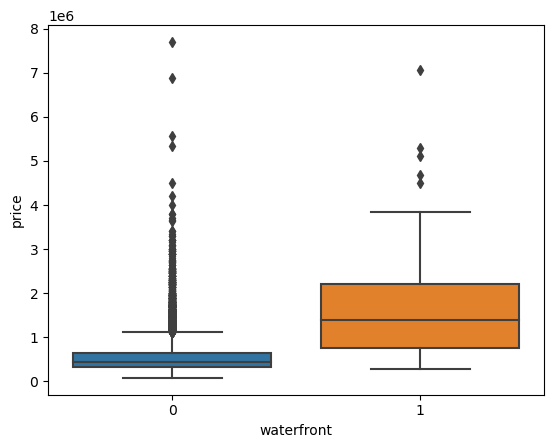

In [20]:
sns.boxplot(x='waterfront',y='price',data=df)

#### boxplot shows that if the house in on waterfront the house is likey to be expensive.




## Feature Engineering:

### Dropping the ID column as it has no effect on the price column.

In [21]:
df = df.drop('id',axis=1)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### converting the date column from object to datetime object to extract year and month.

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

### applying lambda function using apply() method to extract month and year column from date column

In [25]:
df['year'] = df['date'].apply(lambda date:date.year)

In [26]:
df['month'] = df['date'].apply(lambda date:date.month)

### box plot to see distribution of price per month

<AxesSubplot: xlabel='month', ylabel='price'>

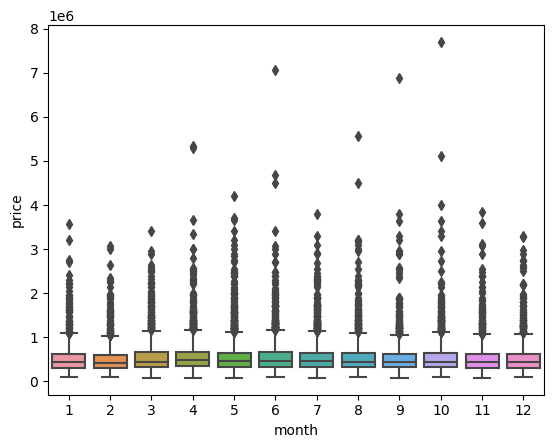

In [27]:
#boxplot between month and price
sns.boxplot(x='month',y='price',data=df)

### box plot to see distribution of price per year

<AxesSubplot: xlabel='year', ylabel='price'>

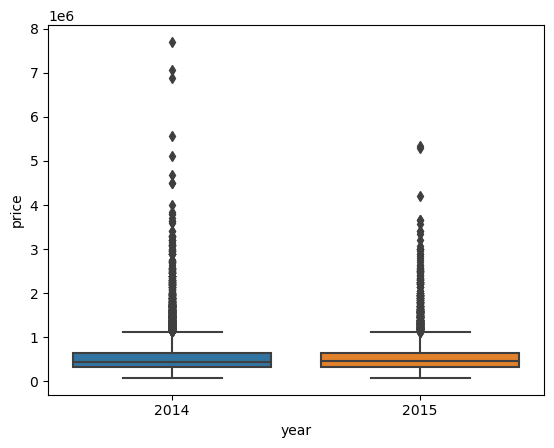

In [28]:
#boxplot between month and price
sns.boxplot(x='year',y='price',data=df)

/var/folders/cn/r_mvyq893c357lflld6x0pvw0000gn/T/ipykernel_34209/311950038.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot()


<AxesSubplot: xlabel='year'>

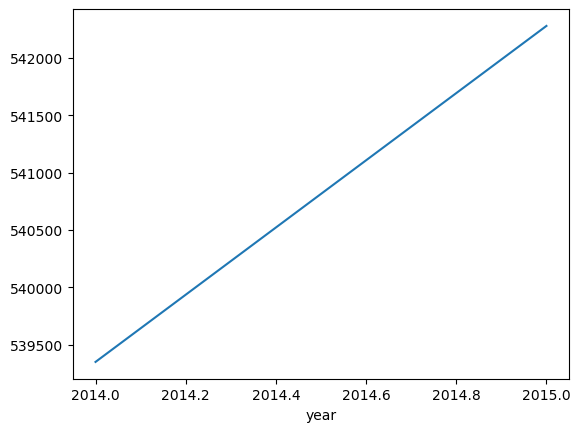

In [29]:
#group by year to see behaviour difference of price in year
df.groupby('year').mean()['price'].plot()

/var/folders/cn/r_mvyq893c357lflld6x0pvw0000gn/T/ipykernel_34209/3305584705.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price'].plot()


<AxesSubplot: xlabel='month'>

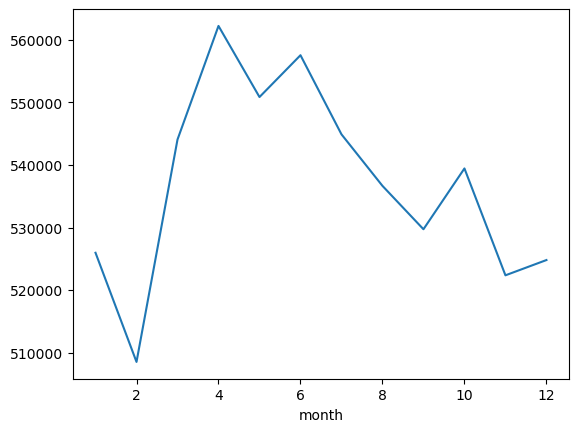

In [30]:
#group by year to see behaviour difference of price in month
df.groupby('month').mean()['price'].plot()

In [31]:
#dropping the date column
df = df.drop('date',axis=1)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [33]:
#checking how many individual categories are there in zipcode
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [34]:
#dropping the zipcode column
df = df.drop('zipcode',axis=1)

In [35]:
#checking yr_renovated column
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [36]:
#checking sqft_basement column
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

### splitting the data into train set and test set to fit into the model

In [37]:
x=df.drop('price',axis=1)
y=df['price']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [40]:
#scaling the data so that all avlues lies in the range of 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler=MinMaxScaler()

In [42]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## KNN:

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
knn=KNeighborsRegressor()

In [45]:
#fitting the train set into the model
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [46]:
#predicting the test set
pred=knn.predict(X_test)

In [47]:

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
#calculating mean_absolute_error
mean_absolute_error(y_test,pred)

91853.1124691358

In [49]:
#calculating RMSE(root mean squared error)
np.sqrt(mean_squared_error(y_test,pred))

178218.6296581254

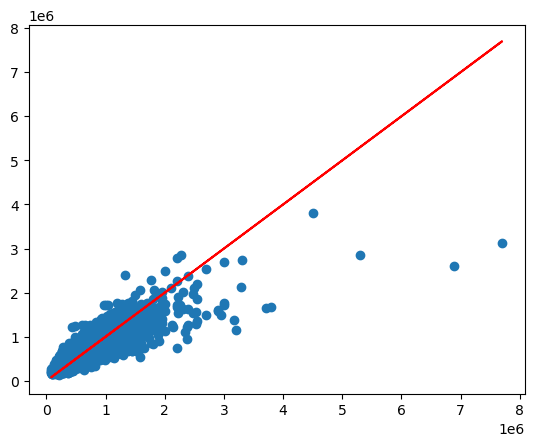

In [50]:
# Our predictions from the model
plt.scatter(y_test,pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')